# KNN

# MNIST手写识别

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 获取数据集

In [3]:
# 获取数据集
>>> from sklearn.datasets import fetch_openml
>>> mnist = fetch_openml ('mnist_784', version = 1)
>>> mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Scikit-Learn加载的数据集通常具有类似的字典结构，包括：\
·DESCR键，描述数据集。\
·data键，包含一个数组，每个实例为一行，每个特征为一列。\
·target键，包含一个带有标记的数组。

In [4]:
# 提取特征 X 和标签 y
>>> X, y = mnist["data"], mnist["target"]
>>> X.shape

(70000, 784)

In [5]:
>>> y.shape

(70000,)

共有7万张图片，每张图片有784个特征。因为图片是28×28像素，
每个特征代表了一个像素点的强度，从0（白色）到255（黑色）。先来
看看数据集中的一个数字，你只需要随手抓取一个实例的特征向量，将
其重新形成一个28×28数组，然后使用Matplotlib的imshow（）函数将
其显示出来：

In [6]:
# 将 y 转为整数类型
y = y.astype(int)

# 检查前几个标签
print("前5个标签:", y[:5])  # [5 0 4 1 9]

前5个标签: 0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int64


In [7]:
print(type(X))   

<class 'pandas.core.frame.DataFrame'>


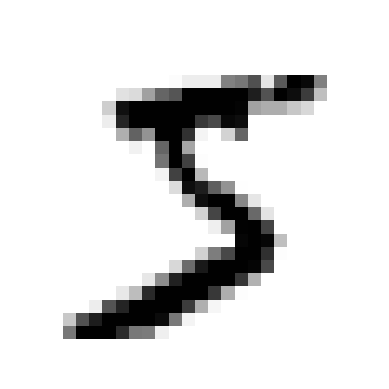

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.iloc[0] 
some_digit_image = some_digit.values.reshape(28, 28) 
# 这里本来应该写：
# some_digit = X[0]  # ✅ 正确：取第一个样本
# some_digit_image = some_digit.reshape(28, 28)
# 但是从type可知 X 被转成了DataFrame，所以要用。iloc来取位置
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

## 划分训练集和测试集
事实上，MNIST数据集已经分成训练集（前6
万张图片）和测试集（最后1万张图片）了：

In [9]:
# 划分训练集和测试集（60k 训练，10k 测试）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42, stratify=y
)

print("训练集大小:", X_train.shape[0])  # 60000
print("测试集大小:", X_test.shape[0])   # 10000

训练集大小: 60000
测试集大小: 10000


test_size=10000: 保留 1 万张做测试\
stratify=y: 保证训练/测试集中各类别比例一致（避免某类太少）

In [10]:
print("X_train shape:", X_train.shape)  # 应该是 (60000, 784)
print("X_test shape:", X_test.shape)    # 应该是 (10000, 784)
print("y_train shape:", y_train.shape)  # 应该是 (60000,)
print("y_test shape:", y_test.shape)    # 应该是 (10000,)

X_train shape: (60000, 784)
X_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


## 用sklearn 实现 KN


In [17]:
# 创建 KNN 分类器，K=3
knn_clf = KNeighborsClassifier(n_neighbors=3)

# 训练模型（其实只是把数据存起来）
knn_clf.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## 预测测试集

In [12]:
# 预测测试集标签
y_pred = knn_clf.predict(X_test)

## 计算准确度

In [13]:
acc = accuracy_score(y_test, y_pred)
print(f"准确率: {acc:.4f}")  # 大约 0.9688 → 96.88%

准确率: 0.9735


In [14]:
# 查看详细报告
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       986
           1       0.97      1.00      0.98      1125
           2       0.99      0.97      0.98       999
           3       0.97      0.97      0.97      1020
           4       0.98      0.96      0.97       975
           5       0.96      0.97      0.97       902
           6       0.98      0.99      0.98       982
           7       0.97      0.98      0.97      1042
           8       0.99      0.94      0.97       975
           9       0.95      0.96      0.96       994

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



解读： 

precision: 预测为某类的样本中，有多少是真的

recall: 实际是某类的样本中，有多少被正确预测

f1-score: 精确率和召回率的调和平均

###  混淆矩阵（Confusion Matrix）

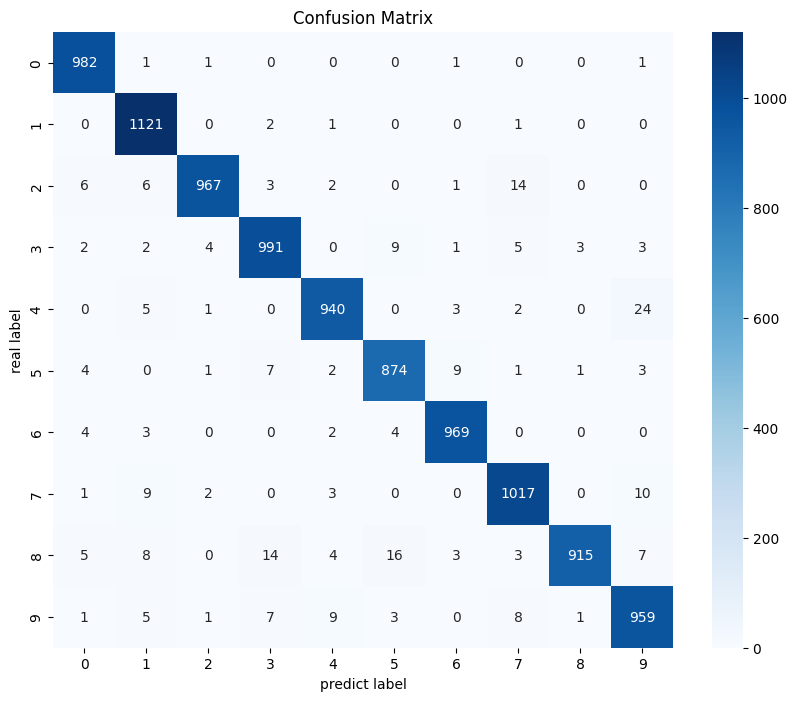

In [15]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("predict label")
plt.ylabel("real label")
plt.show()

解释这张图：

 1. 对角线上的数字 → 正确预测的数量

第 3 行第 3 列的 991：表示真实是“3”的图片，有 991 张被正确预测为“3”

第 4 行第 5 列的 24：表示真实是“4”的图片，有 24 张被错误预测为“5”


2. 非对角线上的数字 → 错误预测的数量

第4行第9列 = 24： 有 24 张真实是“4”的图片，被模型错判为“9”


## 调参-如何选择最佳k值

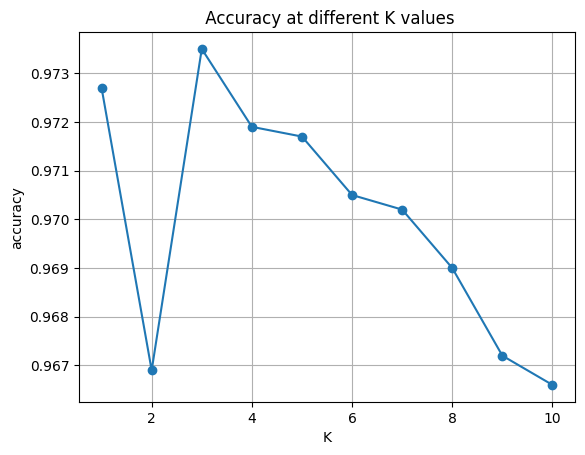

Best K values: 3


In [18]:
# 尝试不同的 K 值，找出最优
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# 画图
plt.plot(k_range, scores, marker='o')
plt.title(" Accuracy at different K values")
plt.xlabel("K")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

# 最佳 K
best_k = k_range[np.argmax(scores)]
print(f"Best K values: {best_k}")

📈 通常 K=3~7 表现最好。太小（K=1）容易受噪声影响；太大则过于平滑。 

## neigbors = 1
k-NN 算法最简单的版本只考虑一个最近邻，也就是与我们想要预测的数据点最近的训练
数据点。预测结果就是这个训练数据点的已知输出。

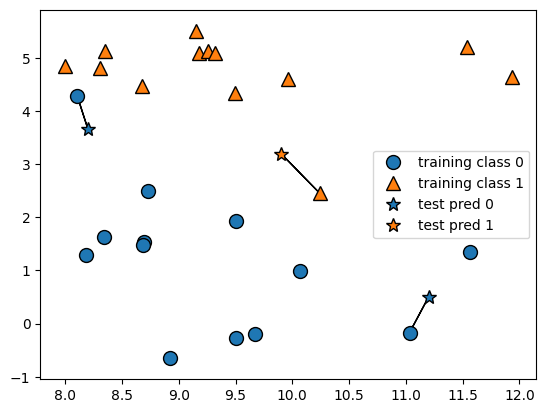

In [6]:
 mglearn.plots.plot_knn_classification(n_neighbors=1)

## neigbors = 3
在考虑多于一个邻居的情况时，我们用“投票法”（voting）来指定标签。也就是说，对
于每个测试点，我们数一数多少个邻居属于类别0，多少个邻居属于类别1。然后将出现
次数更多的类别（也就是k个近邻中占多数的类别）作为预测结果。

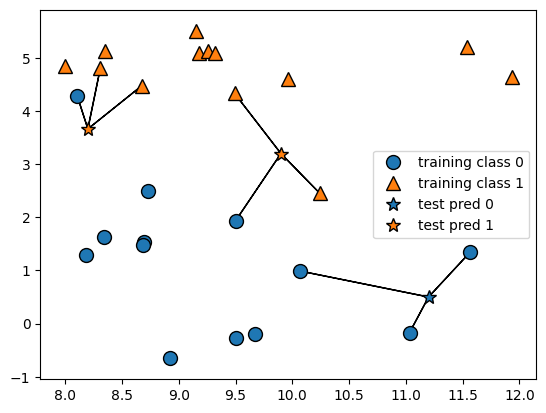

In [7]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

# 如何通过scikit-learn来应用k近邻算法
## 划分训练集和测试集

In [8]:
from sklearn.model_selection import train_test_split 
X, y = mglearn.datasets.make_forge() 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 导入类并将其实例化
这时可以设定参数，比如邻居的个数。这里我们将其设为3：

In [9]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=3)

## 拟合
现在，利用训练集对这个分类器进行拟合。对于KNeighborsClassifier来说就是保存数据
集，以便在预测时计算与邻居之间的距离：

In [10]:
clf.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## 预测
调用predict 方法来对测试数据进行预测。对于测试集中的每个数据点，都要计算它在训
练集的最近邻，然后找出其中出现次数最多的类别

In [11]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


## 评估模型泛化能力

In [13]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


可以看到，我们的模型精度约为86%，也就是说，在测试数据集中，模型对其中86%的
样本预测的类别都是正确的。

# 分析KNeighborsClassifier

## 决策边界（decision boundary）
下列代码分别将1个、3个和9个邻居三种情况的决策边界可视化

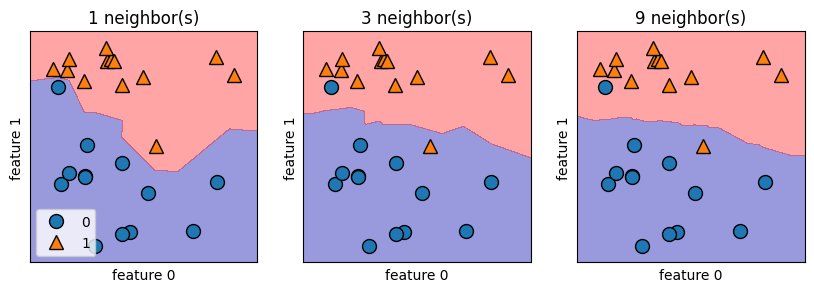

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3)) 
for n_neighbors, ax in zip([1, 3, 9], axes): 
    # fit方法返回对象本身，所以我们可以将实例化和拟合放在一行代码中 
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y) 
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4) 
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax) 
    ax.set_title("{} neighbor(s)".format(n_neighbors)) 
    ax.set_xlabel("feature 0") 
    ax.set_ylabel("feature 1") 
axes[0].legend(loc=3)

从左图可以看出，使用单一邻居绘制的决策边界紧跟着训练数据。随着邻居个数越来越
多，决策边界也越来越平滑。更平滑的边界对应更简单的模型。

换句话说，使用更少的邻
居对应更高的模型复杂度（如图2-1右侧所示），而使用更多的邻居对应更低的模型复杂度
（如图2-1左侧所示）

假如考虑极端情况，即邻居个数等于训练集中所有数据点的个数，
那么每个测试点的邻居都完全相同（即所有训练点），所有预测结果也完全相同（即训练
集中出现次数最多的类别）。

# k 近邻回归
k 近邻算法还可以用于回归。我们还是先从单一近邻开始，这次使用wave数据集。我们添
加了3个测试数据点，在x轴上用绿色五角星表示。利用单一邻居的预测结果就是最近邻
的目标值。

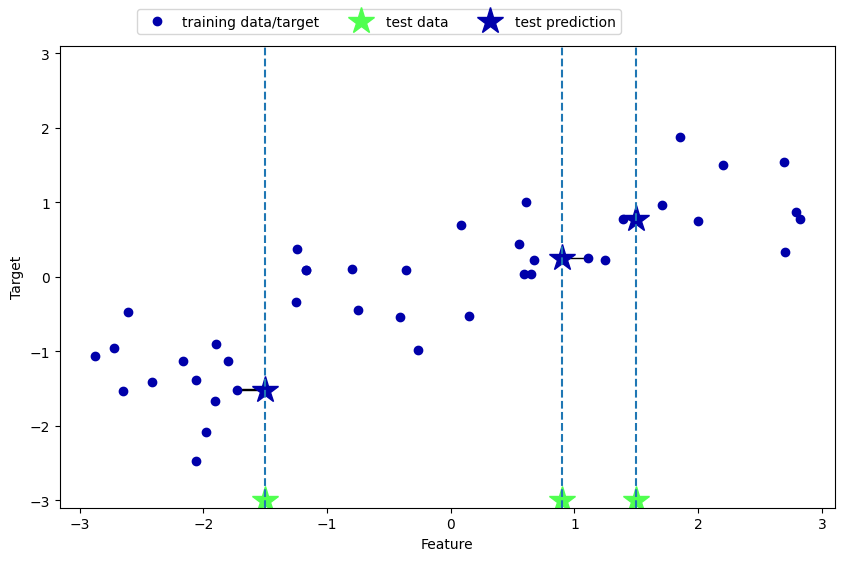

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

同样，也可以用多个近邻进行回归。

**在使用多个近邻时，预测结果为这些邻居的平均值**

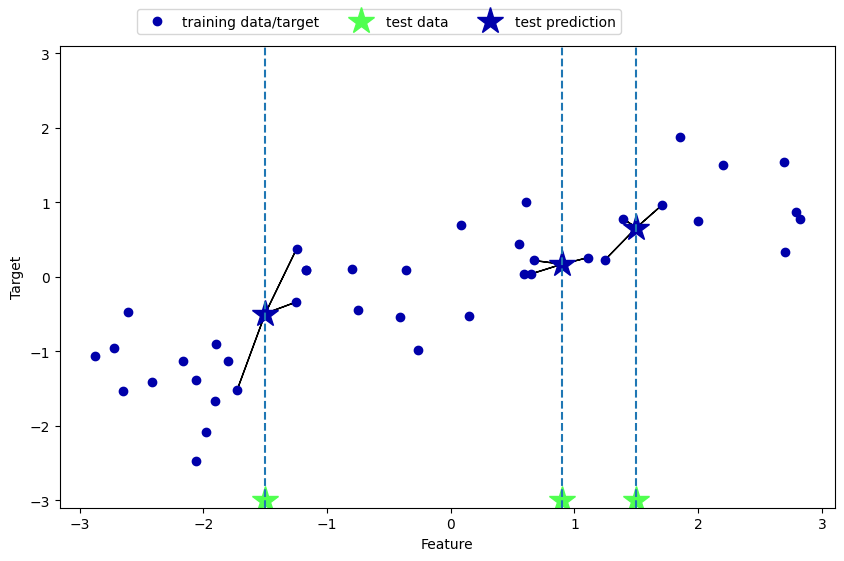

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

## 划分数据集和实例化
用于回归的k近邻算法在scikit-learn的KNeighborsRegressor 类中实现。其用法与
KNeighborsClassifier 类似：

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples = 40)

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# 实例化
reg = KNeighborsRegressor(n_neighbors = 3)

# 拟合
reg.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## 预测

In [29]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [31]:
formatted_predictions = ["{:.2f}".format(x) for x in reg.predict(X_test)]
print("Test set predictions:\n{}".format(formatted_predictions))

Test set predictions:
['-0.05', '0.36', '1.14', '-1.89', '-1.14', '-1.63', '0.36', '0.91', '-0.45', '-1.14']


我们还可以用score方法来评估模型，对于回归问题，这一方法返回的是R2分数。

R2分
数也叫作决定系数，是回归模型预测的优度度量，位于0到1之间。R2等于1对应完美预
测，R2等于0对应常数模型，即总是预测训练集响应（y_train）的平均值

In [32]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


# 分析KNeighborsRegressor
对于我们的一维数据集，可以查看所有特征取值对应的预测结果（图2-10）。为了便于绘
图，我们创建一个由许多点组成的测试数据集：

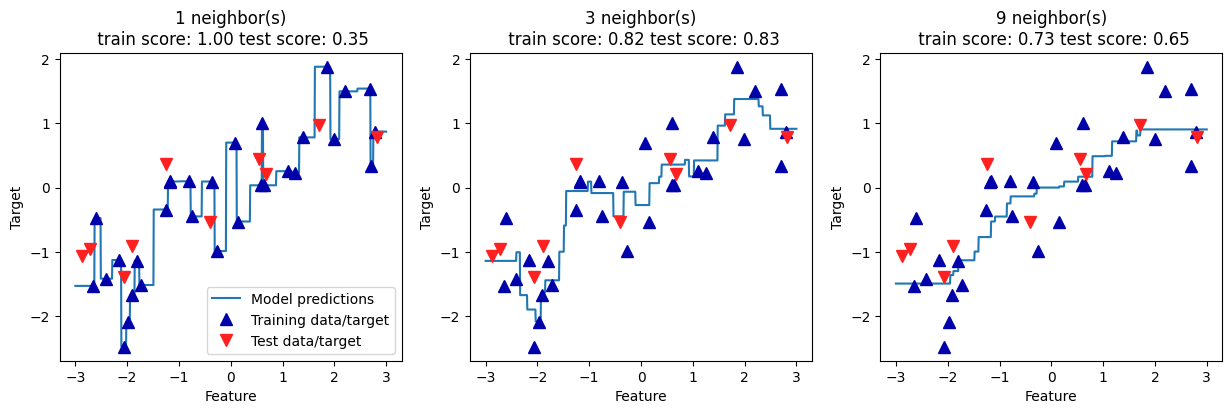

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) 
# 创建1000个数据点，在-3和3之间均匀分布 
line = np.linspace(-3, 3, 1000).reshape(-1, 1) 
for n_neighbors, ax in zip([1, 3, 9], axes): 
    # 利用1个、3个或9个邻居分别进行预测 
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) 
    reg.fit(X_train, y_train) 
    ax.plot(line, reg.predict(line)) 
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8) 
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8) 
    ax.set_title( 
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format( 
            n_neighbors, reg.score(X_train, y_train), 
            reg.score(X_test, y_test))) 
    ax.set_xlabel("Feature") 
    ax.set_ylabel("Target") 
axes[0].legend(["Model predictions", "Training data/target", 
                "Test data/target"], loc="best")

从图中可以看出，仅使用单一邻居，训练集中的每个点都对预测结果有显著影响，预测结
果的图像经过所有数据点。这导致预测结果非常不稳定。考虑更多的邻居之后，预测结果
变得更加平滑，但对训练数据的拟合也不好。